# Homework 11

## Submission by Gagan Ullas Nirgun,Viswadeep Mallarapu Bhaskar

## 1 (a)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import zipfile
import io

In [17]:
bird_img = np.array(Image.open('bird128.png')) / 255.0

In [18]:
with zipfile.ZipFile('horses.zip', 'r') as zip_ref:
    zip_ref.extractall('horses')

horse_images = []
for i in range(1, 329):
    try:
        horse_path = f'horses/horse{i:03d}.png'
        horse_img = (np.array(Image.open(horse_path)) / 255.0).flatten()
        horse_images.append(horse_img)
    except IOError:
        print(f"File Not found :horse{i:03d}.png")

horse_images_mat=np.array(horse_images)
mean_horse_images_mat=np.mean(horse_images_mat, axis=0)
horse_images_mat =  horse_images_mat - mean_horse_images_mat

File Not found :horse318.png


In [19]:
U, S, V = np.linalg.svd(horse_images_mat, full_matrices=False)

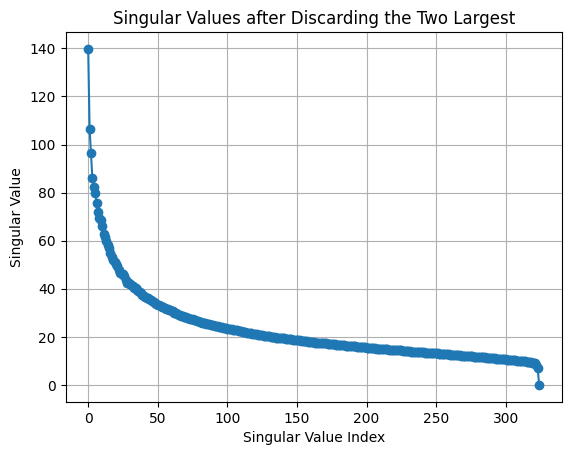

In [20]:
S1=S[2:]

# Plot the remaining singular values
plt.plot(S1, marker='o')
plt.title('Singular Values after Discarding the Two Largest')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.grid(True)
plt.show()

# 1 (b)

In [21]:
horse_projected = np.dot(horse_images_mat, V.T[:, :2])

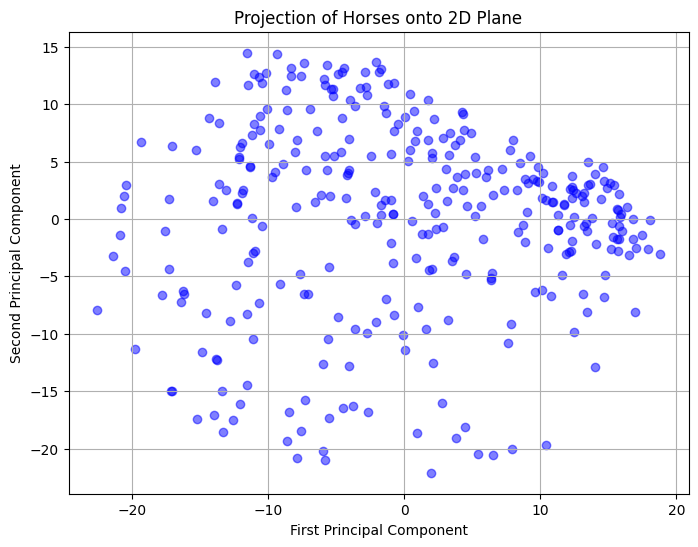

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(horse_projected[:, 0], horse_projected[:, 1],alpha=0.5, color='blue', label='Horses')
plt.title('Projection of Horses onto 2D Plane')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid(True)
plt.show()

# 1 (C)

In [23]:
bird_mean_centered = bird_img.flatten() - mean_horse_images_mat
bird_projected = np.dot(bird_mean_centered, V.T[:, :2])

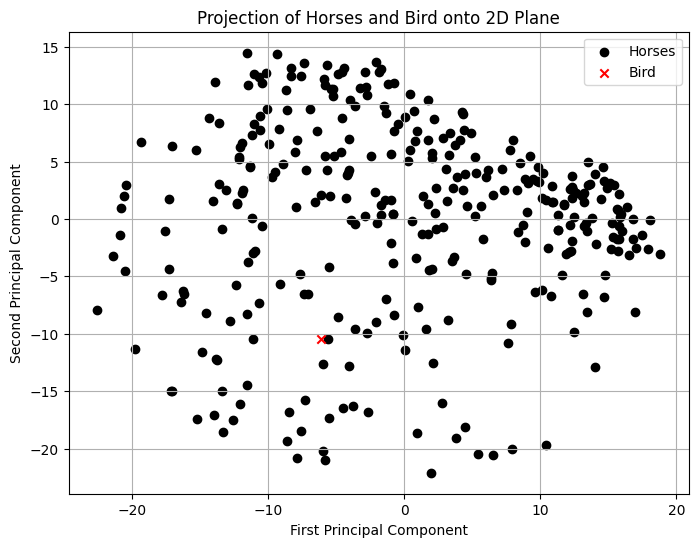

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(horse_projected[:, 0], horse_projected[:, 1], color='black', label='Horses')
plt.scatter(bird_projected[0], bird_projected[1], color='red', marker='x', label='Bird')
plt.title('Projection of Horses and Bird onto 2D Plane')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.grid(True)
plt.show()

# 1 (d)

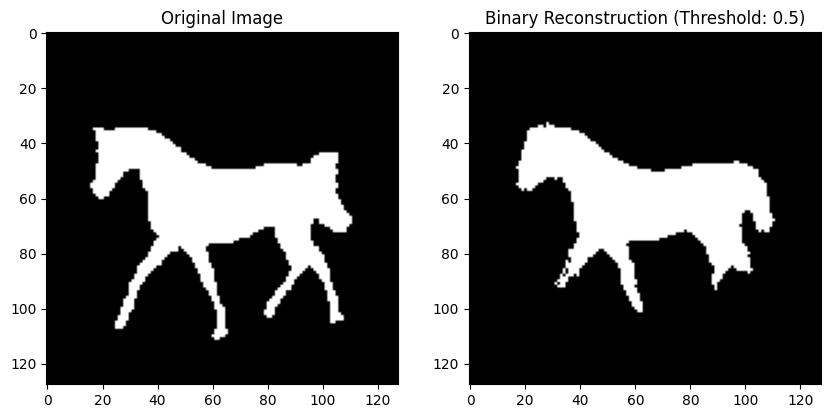

In [25]:
horse_img = np.array(Image.open('horses/horse060.png')) / 255.0

horse_img_flat = horse_img.flatten()

reconstructed_img = np.dot(horse_img_flat - mean_horse_images_mat , V[:20, :].T)

reconstructed_img = np.dot(reconstructed_img, V[:20, :])

reconstructed_img = reconstructed_img + mean_horse_images_mat

reconstructed_img = (reconstructed_img >= 0.5).astype(np.uint8) * 255

reconstructed_img = reconstructed_img.reshape(horse_img.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(horse_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Binary Reconstruction (Threshold: 0.5)')

plt.show()

# 1 (e)

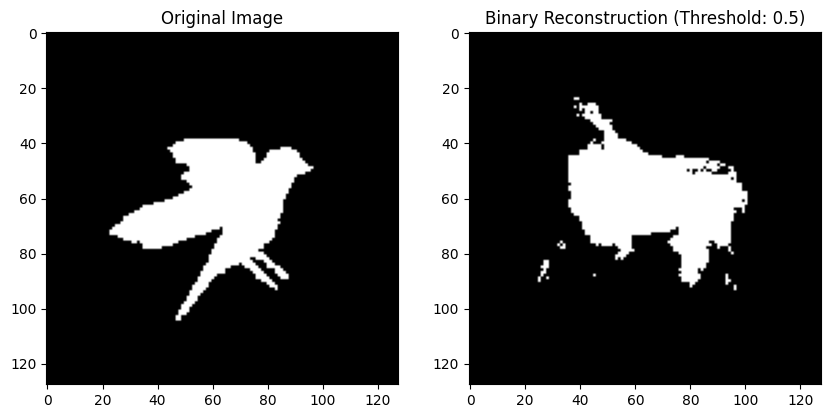

In [26]:
bird_img = np.array(Image.open('bird128.png')) / 255.0

bird_img_flat = bird_img.flatten()

reconstructed_img = np.dot(bird_img_flat - mean_horse_images_mat , V[:20, :].T)

reconstructed_img = np.dot(reconstructed_img, V[:20, :])

reconstructed_img = reconstructed_img + mean_horse_images_mat

reconstructed_img = (reconstructed_img >= 0.5).astype(np.uint8) * 255

reconstructed_img = reconstructed_img.reshape(bird_img.shape)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(bird_img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img, cmap='gray')
plt.title('Binary Reconstruction (Threshold: 0.5)')

plt.show()

# 1 (f)

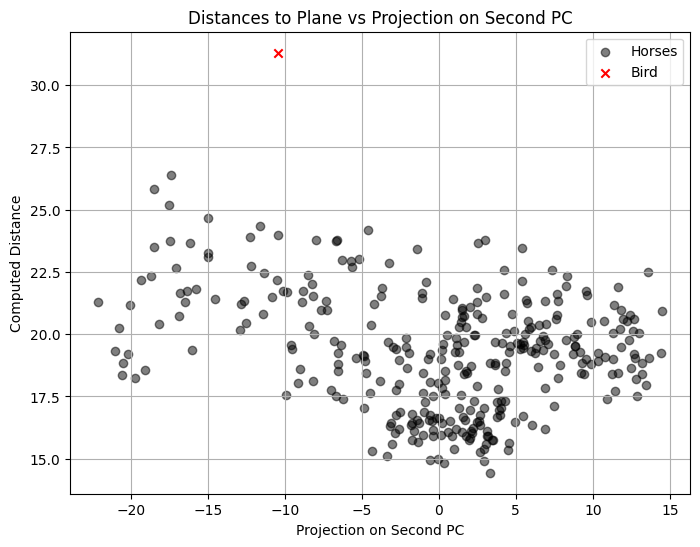

In [27]:
horse_projected = np.dot(horse_images_mat, V.T[:, :32])
 
 
bird_projected = np.dot(bird_img_flat - mean_horse_images_mat, V.T[:, :32])
 
 
horse_distances = np.linalg.norm(horse_images_mat - np.dot(horse_projected, V[:32, :]), axis=1)
bird_distance = np.linalg.norm(bird_img_flat - mean_horse_images_mat - np.dot(bird_projected, V[:32, :]))
 
plt.figure(figsize=(8, 6))
plt.scatter(horse_projected[:, 1], horse_distances, color='black', alpha=0.5, label='Horses')
plt.scatter(bird_projected[1], bird_distance, color='red', marker='x', label='Bird')
plt.title('Distances to Plane vs Projection on Second PC')
plt.xlabel('Projection on Second PC')
plt.ylabel('Computed Distance')
plt.legend()
plt.grid(True)
plt.show()

# 1 (g)

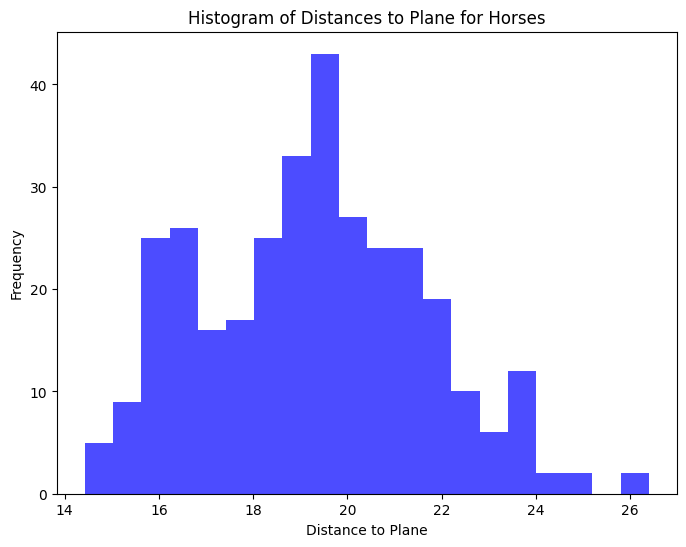

In [28]:
plt.figure(figsize=(8, 6))
plt.hist(horse_distances, bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Distances to Plane for Horses')
plt.xlabel('Distance to Plane')
plt.ylabel('Frequency')
plt.show()